In [1]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 35.8 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#data preprocessing
from sklearn import datasets,metrics

In [5]:
#loading the dataset now.
cancer=datasets.load_breast_cancer()

In [6]:
#print description of datasets.
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
#NOW SELECTING DEPENDENT AND INDEPENDENT VARIABLES.
#MATRIX OF FEATURES MEANS INDEPENDENT VARIABLES.
x=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)

In [8]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#above column names are feature values or independent variables.

In [10]:
#printing dependent variable
y=cancer.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [11]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
#0 for malignant and 1 for benign

In [13]:
x.shape,y.shape

((569, 30), (569,))

In [14]:
#569 columns in our datset and 30 columns.
#now splitting the data into train and test set.

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [17]:
#above we divided data into (x_train,y_train) & (x_test,y_test).

In [18]:
#feature scaling - scaling model throughout dataset and it helps in increasing
#performance of dataset.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
#above we fit x_train into sc object.
x_test=sc.fit_transform(x_test)
#above we fit dataset into x_test object.

In [19]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [20]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [21]:
#in train and test dataset we have only 1 dimension and other is label. 
x_train=x_train.reshape(455,30,1) #converting into 2d 30 x 1.
x_test=x_test.reshape(114,30,1)#converting into 2d again.

In [22]:
#checking shape again
x_train.shape,x_test.shape

((455, 30, 1), (114, 30, 1))

In [23]:
#building the model.
model=tf.keras.models.Sequential()

In [24]:
#1st CNN layer
model.add(tf.keras.layers.Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
#after 1st CNN layer add batch normalization.
#model.add(tf.keras.layers.Conv1D(filters=32,kernel_size=2,activation='ReLU',input_shape=(30,1)))
#batch normalization--> due to it each layer of network learns by itself independent
#of other layers and due to it data processing speeds up.
model.add(tf.keras.layers.BatchNormalization())
#add dropout layer
model.add(tf.keras.layers.Dropout(0.2))
#0.2 or 20% is the percentage of neurons which we are ignoring during training process.
#2nd CNN layer
model.add(tf.keras.layers.Conv1D(filters=64,kernel_size=2,activation='ReLU'))
#batch normalization
model.add(tf.keras.layers.BatchNormalization())
#add dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [25]:
#flatten layer
model.add(tf.keras.layers.Flatten())

In [26]:
#dense layer
model.add(tf.keras.layers.Dense(units=64,activation='ReLU'))
#output layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
#above we add no. of units =1 as there will be binary output.
#binary output--sigmoid.

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [28]:
#compile the model
opt=tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
#training the model
history =  model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
15/15 [==============================] - 2s 28ms/step - loss: 0.6006 - accuracy: 0.7099 - val_loss: 0.6328 - val_accuracy: 0.8246
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.3365 - accuracy: 0.8703 - val_loss: 0.5855 - val_accuracy: 0.8947
Epoch 3/50
15/15 [==============================] - 0s 11ms/step - loss: 0.2564 - accuracy: 0.8879 - val_loss: 0.5472 - val_accuracy: 0.9298
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.2257 - accuracy: 0.9253 - val_loss: 0.5121 - val_accuracy: 0.9474
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.1954 - accuracy: 0.9297 - val_loss: 0.4786 - val_accuracy: 0.9298
Epoch 6/50
15/15 [==============================] - 0s 14ms/step - loss: 0.1675 - accuracy: 0.9341 - val_loss: 0.4457 - val_accuracy: 0.9211
Epoch 7/50
15/15 [==============================] - 0s 18ms/step - loss: 0.1668 - accuracy: 0.9253 - val_loss: 0.4137 - val_accuracy: 0.9211
Epoch 8/50
15

In [30]:
#we got good accuracy above.
#making predictions now.
#y_pred=model.predict_classes(x_test)
y_pred = np.argmax(model.predict(x_test), axis=-1)

4/4 [==============================] - 0s 9ms/step


In [31]:
print(y_pred[0]),print(y_test[0])

0
0


(None, None)

In [32]:
print(y_pred[12]),print(y_test[12])

0
1


(None, None)

In [33]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [34]:
model.evaluate(x_test,y_test) #1ST NO IS THE OUTPUT IS LOSS AND 2ND IS ACCURACY.

4/4 [==============================] - 0s 7ms/step - loss: 0.0781 - accuracy: 0.9649


[0.0781148299574852, 0.9649122953414917]

In [35]:
x_new=x_test[:6] #taking 5 values with indices 0,1,2,3,4,5. 

In [36]:
y_pred=model.predict(x_new)

1/1 [==============================] - 0s 38ms/step


In [37]:
y_pred

array([[0.00376076],
       [0.9693644 ],
       [0.99873656],
       [0.99386466],
       [0.9990849 ],
       [0.99934256]], dtype=float32)

In [38]:
y_test[:6]

array([0, 1, 1, 1, 1, 1])

In [39]:
y_pred.round(0)

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [40]:
#learning curve
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

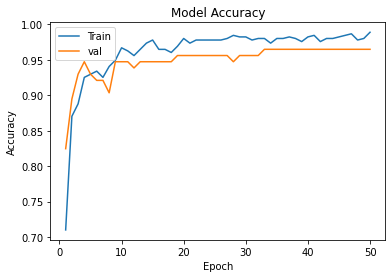

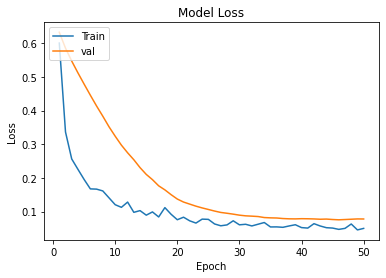

In [41]:
learning_curve(history, 50)

In [42]:
#ABOVE GRAPHS INDICATE THAT THERE IS NO (OR VERY SLIGHT) OVERFITTING IN THE MODEL.